# Análises descritiva e diagnóstica dos dados de exportação e comercialização de vinhos dos últimos 15 anos



---

Autora: Andressa Cucharro

Grupo: 87

Turma: 11DTAT

Este notebook é parte do trabalho [Análise - O Mercado Mundial de Vinhos](https://docs.google.com/document/d/1Q5yDmfZr_w8gutPmLFPLVc4FhF335UjvAQyWjLOFWVM/edit?usp=sharing)

# Análise Descritiva - Exportacao.csv

---



## Entendimento inicial dos dados

In [25]:
# Carregando e visualizando os dados
import pandas as pd

df_exportacao = pd.read_csv('/content/Exportacao.csv', sep=';')

df_exportacao


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,0,0,0,0,0,0,...,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,0,0,4086,9808,26415,35944,23220,32351,141030,220512


In [ ]:
# Visualizando os tipos de dados
df_exportacao.dtypes

,0
Id,int64
País,object
1970,int64
1970.1,int64
1971,int64
...,...
2021.1,int64
2022,int64
2022.1,int64
2023,int64


### Verificação de linhas preenchidas com zero

In [41]:
# Selecionar apenas as colunas numéricas (ignorando 'Id' e 'País')
colunas_numericas = df_exportacao.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'], errors='ignore')

# Verificar se todas as colunas numéricas em uma linha são zero
paises_com_zeros_em_todas_colunas = df_exportacao[
    (colunas_numericas == 0).all(axis=1)
]

# Exibir o nome dos países que se encaixam nesse critério
if not paises_com_zeros_em_todas_colunas.empty:
    print("Países com valor zero em todas as colunas numéricas:")
    display(paises_com_zeros_em_todas_colunas['País'])
else:
    print("Não há países com valor zero em todas as colunas numéricas.")

Não há países com valor zero em todas as colunas numéricas.


### Verificação de valores ausentes



In [44]:
# Calcular a soma de valores nulos para cada coluna
null_counts = df_exportacao.isnull().sum()

# Filtrar apenas as colunas com valores nulos e exibir o resultado
null_counts_summary = null_counts[null_counts > 0]

if not null_counts_summary.empty:
    print("Colunas com valores ausentes:")
    display(null_counts_summary)
else:
    print("Não há valores ausentes em nenhuma coluna.")

Não há valores ausentes em nenhuma coluna.


### Ajustando os dados para melhorar a performance e facilitar a análise inicial

In [69]:
# Excluir colunas de anos abaixo de 2000, mantendo 'Id' e 'País'
cols_to_keep = ['Id', 'País']
for col in df_exportacao.columns:
    if col not in ['Id', 'País']:
        try:
            # Tentando converter o nome da coluna para float para chegar se é um ano
            if float(col) > 2008:
                cols_to_keep.append(col)
        except ValueError:
            # Se a conversão falhar, não é uma coluna de ano, então passamos
            pass

df_exportacao_filtrado = df_exportacao[cols_to_keep].copy()

# Renomear as colunas
new_columns = {}
for col in df_exportacao_filtrado.columns:
    if col not in ['Id', 'País']:
        year = col.split('.')[0]
        if '.' in col:
            new_columns[col] = f'{year}_dolares'
        else:
            new_columns[col] = f'{year}_litros'

df_exportacao_filtrado.rename(columns=new_columns, inplace=True)

display(df_exportacao_filtrado.head())

,Id,País,2008_dolares,2009_litros,2009_dolares,2010_litros,2010_dolares,2011_litros,2011_dolares,2012_litros,...,2019_litros,2019_dolares,2020_litros,2020_dolares,2021_litros,2021_dolares,2022_litros,2022_dolares,2023_litros,2023_dolares
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",429970,225086,393482,27715,138666,36070,144150,8189,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,71083,54786,84235,33557,189891,13889,69001,2833,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Estatísticas descritivas para as colunas numéricas

In [70]:
# Selecionar apenas as colunas numéricas (ignorando 'Id' e 'País') do dataframe já filtrado
colunas_numericas_df_filtrado = df_exportacao_filtrado.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'], errors='ignore')

colunas_numericas_df_filtrado.describe()

,2008_dolares,2009_litros,2009_dolares,2010_litros,2010_dolares,2011_litros,2011_dolares,2012_litros,2012_dolares,2013_litros,...,2019_litros,2019_dolares,2020_litros,2020_dolares,2021_litros,2021_dolares,2022_litros,2022_dolares,2023_litros,2023_dolares
count,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,137.00000,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,5.195693e+04,1.862350e+05,6.526269e+04,9347.255474,18943.817518,8867.40146,2.638774e+04,4.215603e+04,4.030141e+04,6.678145e+04,...,2.301367e+04,4.331990e+04,3.218772e+04,4.436707e+04,5.882266e+04,7.191199e+04,5.128455e+04,7.989257e+04,4.042984e+04,6.513194e+04
std,2.521665e+05,1.875513e+06,4.956982e+05,50143.012175,70637.948247,37344.46844,1.049542e+05,3.880981e+05,1.992898e+05,5.308868e+05,...,2.075268e+05,3.321611e+05,2.845511e+05,3.371742e+05,5.596577e+05,6.183216e+05,4.388905e+05,6.202506e+05,3.273649e+05,4.786300e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,1.300000e+01,9.000000e+00,2.000000e+01,2.000000e+01,6.000000e+01,1.100000e+01,3.100000e+01
75%,1.882000e+03,4.100000e+01,1.000000e+02,0.000000,0.000000,911.00000,3.317000e+03,7.920000e+02,3.300000e+03,8.000000e+00,...,6.280000e+02,2.144000e+03,1.013000e+03,3.824000e+03,1.313000e+03,6.525000e+03,1.521000e+03,6.145000e+03,2.485000e+03,7.402000e+03
max,2.352768e+06,2.191291e+07,5.732280e+06,510989.000000,478630.000000,306787.00000,1.030254e+06,4.528176e+06,2.103968e+06,5.893291e+06,...,2.419537e+06,3.826587e+06,3.299013e+06,3.869243e+06,6.522527e+06,7.192362e+06,5.076670e+06,7.156293e+06,3.780378e+06,5.517263e+06


### Análise de colunas categóricas

In [71]:
# Calcular a frequência de cada país na coluna 'País'
frequencia_paises = df_exportacao_filtrado['País'].value_counts()

# Filtrar países com frequência maior que 1
paises_repetidos = frequencia_paises[frequencia_paises > 1]

# Exibir os países repetidos, se houver
if not paises_repetidos.empty:
    print("Países com frequência maior que 1:")
    display(paises_repetidos)
else:
    print("Não há países com frequência maior que 1.")

Não há países com frequência maior que 1.


## Análise Temporal - Agregando por País e Ano

In [72]:
# Mudando o DataFrame filtrado para o formato longo
df_exportacao_longo = df_exportacao_filtrado.melt(
    id_vars=['Id', 'País'],
    var_name='Ano_Medida',
    value_name='Valor'
)

# Extrair Ano e Tipo de 'Ano_Medida'
df_exportacao_longo['Ano'] = df_exportacao_longo['Ano_Medida'].apply(lambda x: int(x.split('_')[0]))
df_exportacao_longo['Tipo'] = df_exportacao_longo['Ano_Medida'].apply(lambda x: x.split('_')[1])

# Eliminar a coluna original 'Ano_Medida'
df_exportacao_longo.drop(columns=['Ano_Medida'], inplace=True)

# Exibir as primeiras linhas do DataFrame longo
display(df_exportacao_longo.head())

# Pivotar o DataFrame para ter litros e dolares em colunas separadas
df_pivotado = df_exportacao_longo.pivot_table(
    index=['Id', 'País', 'Ano'],
    columns='Tipo',
    values='Valor'
).reset_index()

# Exibir as primeiras linhas do DataFrame pivotado
display(df_pivotado.head())

,Id,País,Valor,Ano,Tipo
0,1,Afeganistão,0,2008,dolares
1,2,África do Sul,0,2008,dolares
2,3,"Alemanha, República Democrática",429970,2008,dolares
3,4,Angola,71083,2008,dolares
4,5,Anguilla,0,2008,dolares


Tipo,Id,País,Ano,dolares,litros
0,1,Afeganistão,2008,0.0,NaN
1,1,Afeganistão,2009,0.0,0.0
2,1,Afeganistão,2010,0.0,0.0
3,1,Afeganistão,2011,0.0,0.0
4,1,Afeganistão,2012,0.0,0.0


### Gerando gráfico dos top 10 países em quantidade de litros
- *Pergunta de negócio: Quais são nossos maiores clientes?*

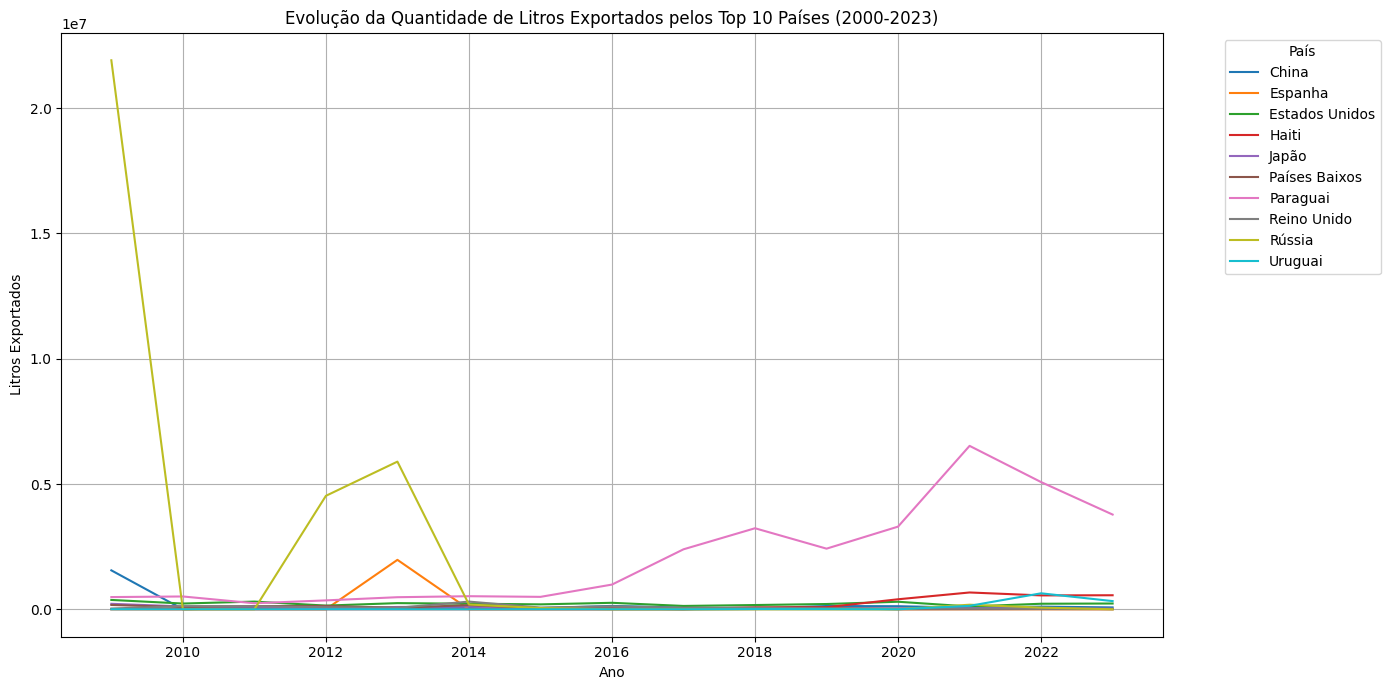

In [73]:
# Calcular o total de litros por país para identificar os top 10
total_litros_por_pais = df_pivotado.groupby('País')['litros'].sum().reset_index()

# Obter os top 10 países com base no total de litros
top_10_paises_litros = total_litros_por_pais.nlargest(10, 'litros')['País'].tolist()

# Filtrar o DataFrame pivotado para incluir apenas os top 10 países
df_top_10_litros = df_pivotado[df_pivotado['País'].isin(top_10_paises_litros)]

# Gerar o gráfico de linhas para a evolução da quantidade de litros dos top 10 países
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_10_litros, x='Ano', y='litros', hue='País')
plt.title('Evolução da Quantidade de Litros Exportados pelos Top 10 Países (2000-2023)')
plt.xlabel('Ano')
plt.ylabel('Litros Exportados')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Gerando gráfico dos top 10 países em dólares
- *Pergunta de negócio: Quais são nossos maiores clientes?*

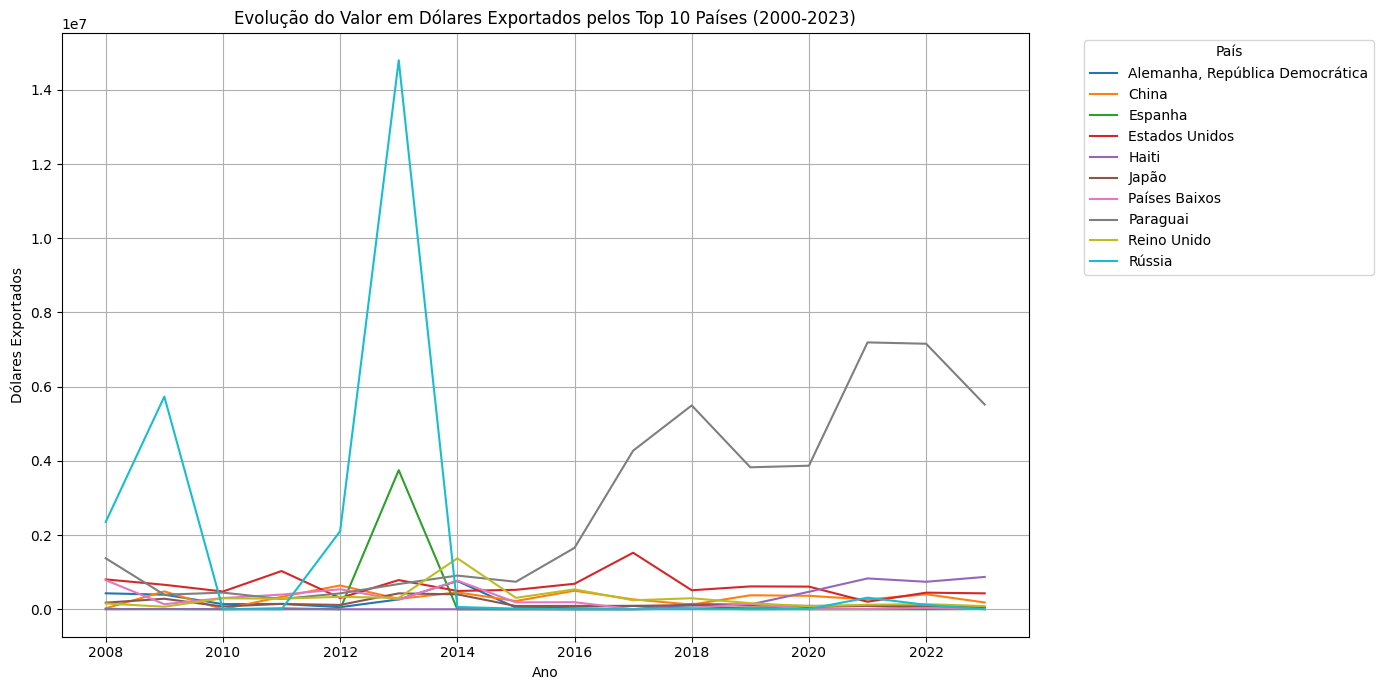

In [74]:
# Calcular o total de dólares por país para identificar os top 10
total_dolares_por_pais = df_pivotado.groupby('País')['dolares'].sum().reset_index()

# Obter os top 10 países com base no total de dólares
top_10_paises_dolares = total_dolares_por_pais.nlargest(10, 'dolares')['País'].tolist()

# Filtrar o DataFrame pivotado para incluir apenas os top 10 países
df_top_10_dolares = df_pivotado[df_pivotado['País'].isin(top_10_paises_dolares)]

# Gerar o gráfico de linhas para a evolução do valor em dólares dos top 10 países
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_10_dolares, x='Ano', y='dolares', hue='País')
plt.title('Evolução do Valor em Dólares Exportados pelos Top 10 Países (2000-2023)')
plt.xlabel('Ano')
plt.ylabel('Dólares Exportados')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Calcular preço por litro por país e ano


In [75]:
# Calcular o preço por litro (dolares / litros) para cada país e ano
# Adicionar uma pequena constante (epsilon) para evitar divisão por zero, ou usar .replace(0, np.nan)
import numpy as np
df_pivotado['preco_por_litro'] = df_pivotado['dolares'] / df_pivotado['litros'].replace(0, np.nan)

# Exibir as primeiras linhas do DataFrame com o novo cálculo
display(df_pivotado.head())

Tipo,Id,País,Ano,dolares,litros,preco_por_litro
0,1,Afeganistão,2008,0.0,NaN,NaN
1,1,Afeganistão,2009,0.0,0.0,NaN
2,1,Afeganistão,2010,0.0,0.0,NaN
3,1,Afeganistão,2011,0.0,0.0,NaN
4,1,Afeganistão,2012,0.0,0.0,NaN


### Gerando gráfico dos top 10 países em preço por litro
- *Pergunta de negócio: Quais são os nossos clientes mais rentáveis?*

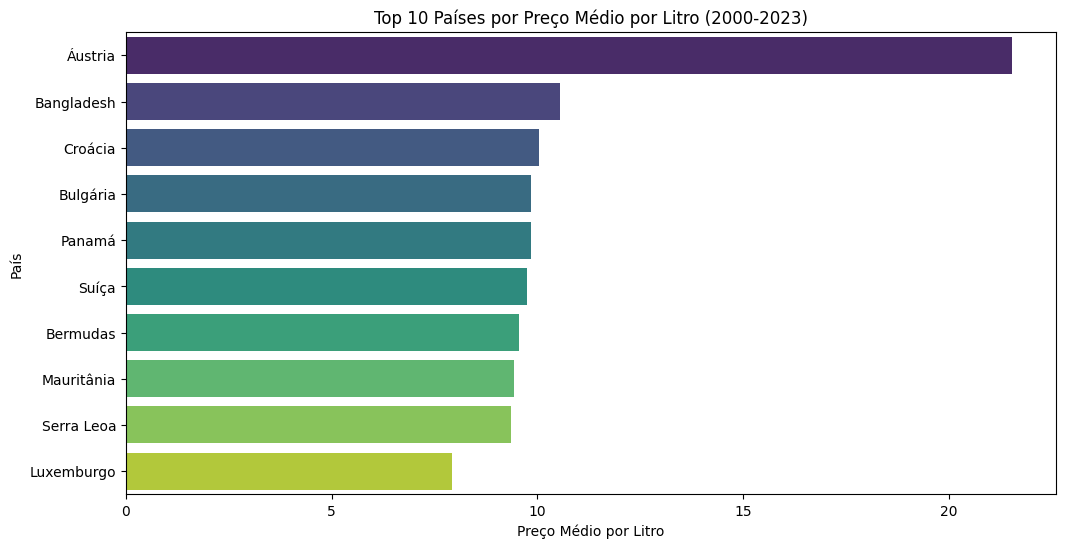

In [94]:
# Calcular o preço médio por litro para cada país, ignorando valores NaN
average_price_per_litro = df_pivotado.groupby('País')['preco_por_litro'].mean().reset_index()

# Obter os top 10 países com o maior preço médio por litro
top_10_paises_preco = average_price_per_litro.nlargest(10, 'preco_por_litro')

# Criar um gráfico de barras para os top 10 países por preço médio por litro
plt.figure(figsize=(12, 6))
sns.barplot(x='preco_por_litro', y='País', data=top_10_paises_preco, palette='viridis', hue='País' )
plt.title('Top 10 Países por Preço Médio por Litro (2000-2023)')
plt.xlabel('Preço Médio por Litro')
plt.ylabel('País')
plt.show()

## Visualizar a evolução por país
- Gerar gráficos de linha separados para cada país, mostrando a evolução dos volumes (litros) e valores (dólares) ao longo dos anos.


In [ ]:
G

# Obter a lista de todos os países únicos
all_countries = df_pivotado['País'].unique()

# Iterar sobre cada país e gerar o gráfico de linha combinado
for pais in all_countries:
    df_pais = df_pivotado[df_pivotado['País'] == pais].copy()

    # Derreter o DataFrame específico do país para plotagem combinada de litros e dólares
    df_pais_longo = df_pais.melt(
        id_vars=['Id', 'País', 'Ano'],
        value_vars=['litros', 'dolares'],
        var_name='Medida',
        value_name='Valor'
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_pais_longo, x='Ano', y='Valor', hue='Medida')
    plt.title(f'Evolução de Litros e Dólares Exportados para {pais} (2000-2023)')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend(title='Medida')
    plt.show()

Top 10 Países por Preço Mediano por Litro (a partir de 2020):


,País,preco_por_litro
136,Áustria,35.333333
47,Espanha,13.836111
79,Luxemburgo,12.130809
117,Suíça,11.333940
96,Nova Zelândia,10.683890
38,Croácia,10.046218
11,Bangladesh,10.000000
16,Bermudas,9.562500
87,Mauritânia,9.444444
44,Emirados Arabes Unidos,8.881089


/tmp/ipython-input-40707997.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preco_por_litro', y='País', data=top_10_paises_median_preco_ultimos_anos, palette='viridis')


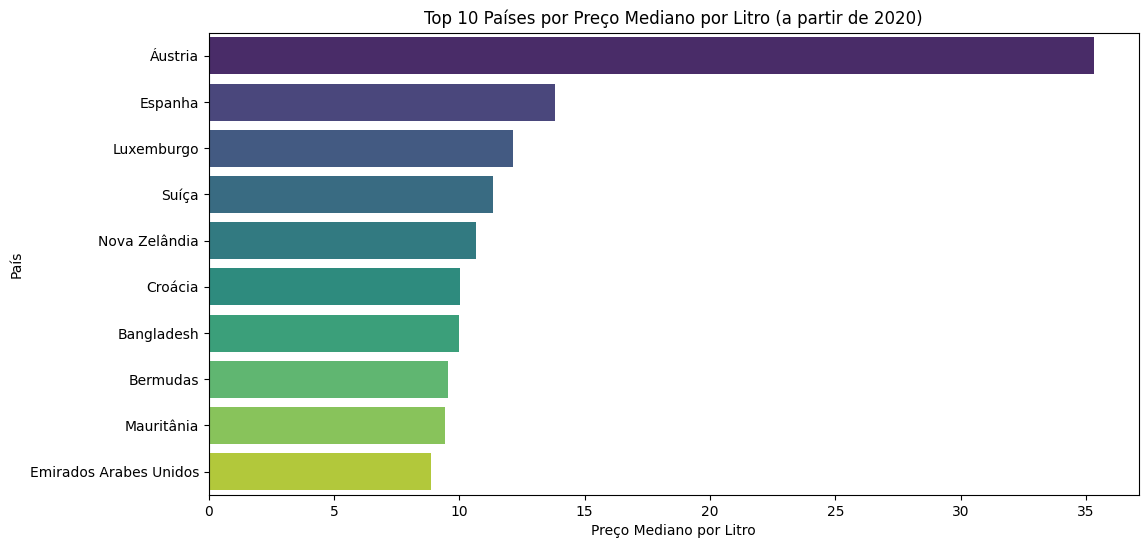

In [80]:
# Filtrar o DataFrame pivotado para incluir apenas os anos a partir de 2020
df_ultimos_anos = df_pivotado[df_pivotado['Ano'] >= 2020].copy()

# Calcular a mediana do preço por litro para cada país nos últimos anos, ignorando NaN
median_price_ultimos_anos = df_ultimos_anos.groupby('País')['preco_por_litro'].median().reset_index()

# Obter os top 10 países com a maior mediana de preço por litro nos últimos anos
top_10_paises_median_preco_ultimos_anos = median_price_ultimos_anos.nlargest(10, 'preco_por_litro')

# Exibir os top 10 países com a maior mediana de preço por litro nos últimos anos
print("Top 10 Países por Preço Mediano por Litro (a partir de 2020):")
display(top_10_paises_median_preco_ultimos_anos)

# Opcional: Gerar um gráfico de barras para visualizar
plt.figure(figsize=(12, 6))
sns.barplot(x='preco_por_litro', y='País', data=top_10_paises_median_preco_ultimos_anos, palette='viridis')
plt.title('Top 10 Países por Preço Mediano por Litro (a partir de 2020)')
plt.xlabel('Preço Mediano por Litro')
plt.ylabel('País')
plt.show()

In [ ]:
# Get the list of top 10 countries by median price per liter from 2020 onwards
top_10_paises_ultimos_anos = top_10_paises_median_preco_ultimos_anos['País'].tolist()

# Filter the pivoted DataFrame to include only these top 10 countries
df_top_10_ultimos_anos_evolucao = df_pivotado[df_pivotado['País'].isin(top_10_paises_ultimos_anos)].copy()

# Melt the filtered DataFrame for combined plotting of liters and dollars
df_top_10_ultimos_anos_longo = df_top_10_ultimos_anos_evolucao.melt(
    id_vars=['Id', 'País', 'Ano'],
    value_vars=['litros', 'dolares'],
    var_name='Medida',
    value_name='Valor'
)

# Iterate over each country in the top 10 and generate the combined line plot
for pais in top_10_paises_ultimos_anos:
    df_pais_longo = df_top_10_ultimos_anos_longo[df_top_10_ultimos_anos_longo['País'] == pais]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_pais_longo, x='Ano', y='Valor', hue='Medida')
    plt.title(f'Evolução de Litros e Dólares Exportados para {pais} (2000-2023) - Top Clientes Recentes')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend(title='Medida')
    plt.show()

## Gerar gráficos anuais dos top 10 países x preços por litro


In [81]:
# Ordenar o DataFrame `df_pivotado` por 'País' e 'Ano'.
df_pivotado = df_pivotado.sort_values(by=['País', 'Ano'])
display(df_pivotado.head())

Tipo,Id,País,Ano,dolares,litros,preco_por_litro
0,1,Afeganistão,2008,0.0,NaN,NaN
1,1,Afeganistão,2009,0.0,0.0,NaN
2,1,Afeganistão,2010,0.0,0.0,NaN
3,1,Afeganistão,2011,0.0,0.0,NaN
4,1,Afeganistão,2012,0.0,0.0,NaN


## Identificar anos únicos



In [88]:
# Obter a lista de anos únicos presentes no DataFrame.
anos_unicos = df_pivotado['Ano'].unique().tolist()
print("Lista de anos únicos:")
print(anos_unicos)

Lista de anos únicos:
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## Iterar por ano e gerar gráficos

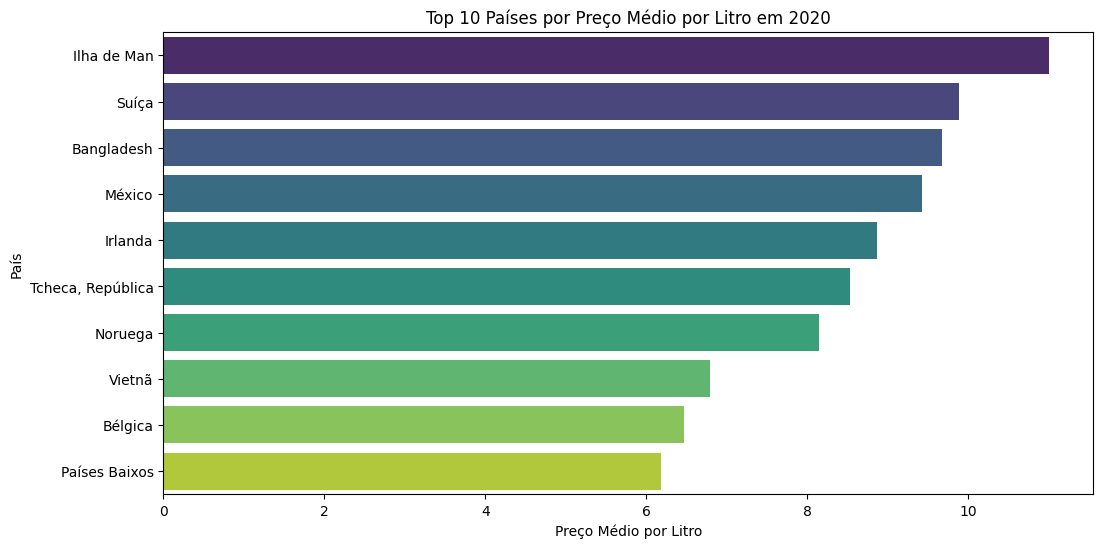

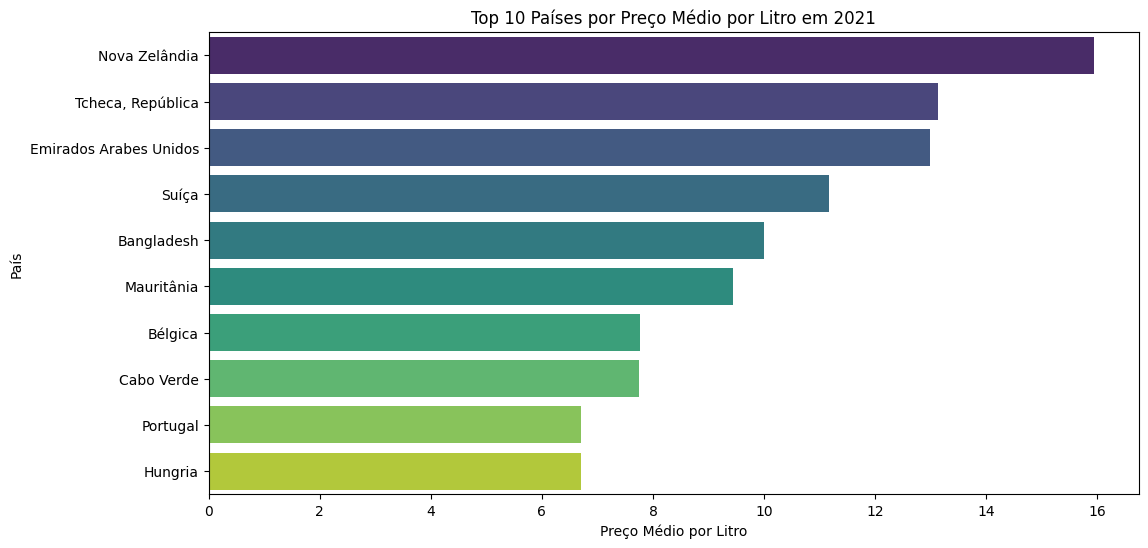

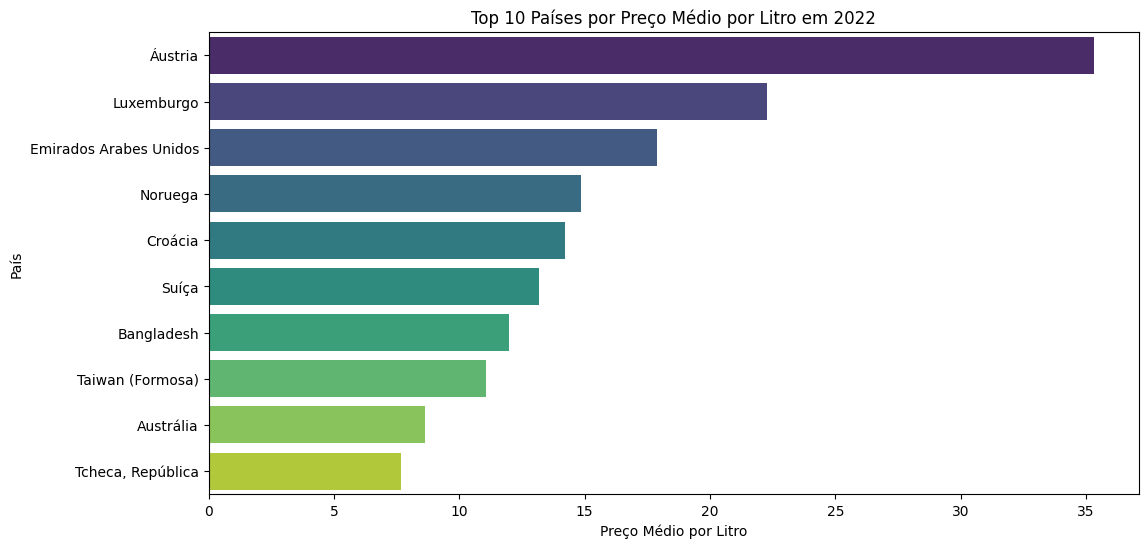

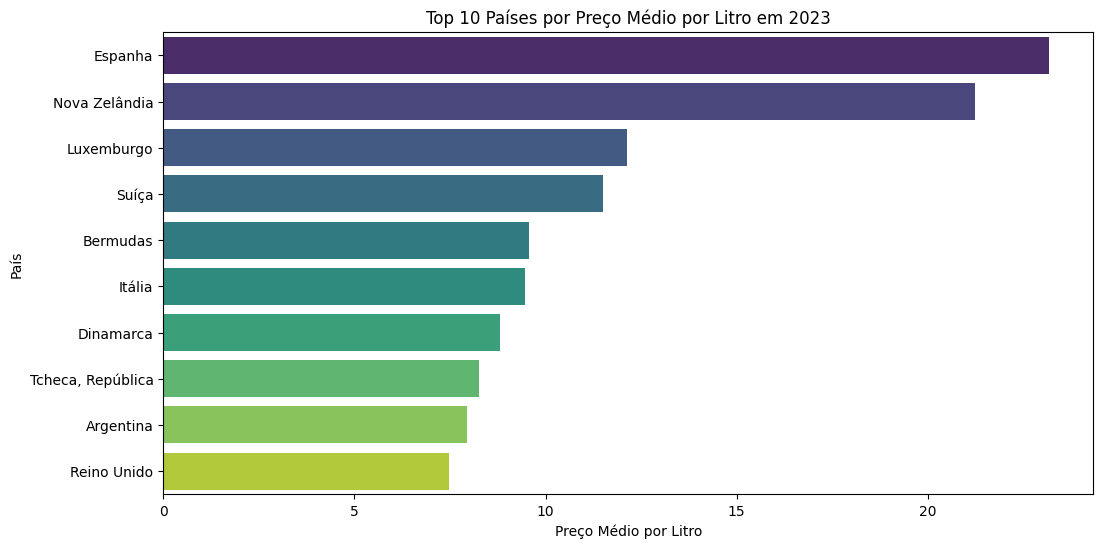

In [91]:
# Para cada ano único, identificar os top 10 países com base no preço por litro e gerar um gráfico de barras correspondente.
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar anos_unicos para incluir apenas anos a partir de 2020
anos_recentes = [year for year in anos_unicos if year >= 2020]

# Iterar sobre cada ano único na lista filtrada
for year in anos_recentes:
    # Filtrar o DataFrame para o ano atual
    df_year = df_pivotado[df_pivotado['Ano'] == year].copy()

    # Calcular o preço médio por litro para cada país no ano atual, ignorando valores NaN
    average_price_year = df_year.groupby('País')['preco_por_litro'].mean().reset_index()

    # Obter os top 10 países com o maior preço médio por litro para o ano atual
    top_10_paises_preco_year = average_price_year.nlargest(10, 'preco_por_litro')

    # Check if there are any countries with non-NaN average price for the year
    if not top_10_paises_preco_year.empty:
        # Criar um gráfico de barras para os top 10 países por preço médio por litro para o ano atual
        plt.figure(figsize=(12, 6))
        sns.barplot(x='preco_por_litro', y='País', data=top_10_paises_preco_year, hue='País', palette='viridis', legend=False)
        plt.title(f'Top 10 Países por Preço Médio por Litro em {year}')
        plt.xlabel('Preço Médio por Litro')
        plt.ylabel('País')
        plt.show()

## Resumo das Descobertas e Próximos Passos

### Resumo da Análise Descritiva:

*   **Estrutura dos Dados:** Exploramos a estrutura inicial do DataFrame, tipos de dados e lidamos com colunas irrelevantes para a análise temporal focada nos anos 2000-2023.
*   **Valores Ausentes e Duplicados:** Verificamos a ausência de valores nulos e a inexistência de países duplicados no DataFrame filtrado.
*   **Estatísticas Descritivas:** Obtivemos um resumo estatístico das colunas numéricas, fornecendo insights sobre a distribuição dos volumes e valores exportados.
*   **Análise Temporal Agregada:** Transformamos os dados para um formato adequado para análise temporal, permitindo a visualização da evolução dos volumes e valores exportados por país ao longo dos anos.
*   **Top Clientes (Volume e Valor):** Identificamos e visualizamos os top 10 países com base no volume total (litros) e valor total (dólares) exportados.
*   **Clientes Mais Rentáveis (Preço por Litro):** Calculamos o preço médio por litro para cada país e identificamos os top 10 países com os maiores preços médios, indicando os clientes potencialmente mais rentáveis.
*   **Evolução Individual por País:** Geramos gráficos de linha para visualizar a evolução dos volumes e valores exportados para cada um dos top 10 países mais rentáveis.

### Próximos Passos (Sugestões):

*   **Análise Preditiva:** Podemos explorar modelos para prever tendências futuras de exportação com base nos dados históricos.
*   **Análise de Segmentação de Clientes:** Podemos agrupar países com base em seus padrões de exportação (volume, valor, preço por litro) para identificar diferentes segmentos de clientes.
*   **Fatores Influenciadores:** Podemos tentar identificar outros fatores (econômicos, políticos, etc.) que possam influenciar os padrões de exportação de vinho.
*   **Análise de Outros DataFrames:** Podemos aplicar análises semelhantes aos outros DataFrames disponíveis (Importacao, Comercializacao, Producao, Processa).

## Resumo das Descobertas e Próximos Passos

### Resumo da Análise Descritiva e Diagnóstica:

*   **Estrutura dos Dados:** Exploramos a estrutura inicial do DataFrame, tipos de dados e lidamos com colunas irrelevantes para a análise temporal focada nos anos 2000-2023.
*   **Valores Ausentes e Duplicados:** Verificamos a ausência de valores nulos e a inexistência de países duplicados no DataFrame filtrado.
*   **Estatísticas Descritivas:** Obtivemos um resumo estatístico das colunas numéricas, fornecendo insights sobre a distribuição dos volumes e valores exportados.
*   **Análise Temporal Agregada por País e Ano:** Transformamos os dados para um formato adequado para análise temporal, permitindo a visualização da evolução dos volumes e valores exportados por país ao longo dos anos.
*   **Top Clientes (Volume e Valor):** Identificamos e visualizamos os top 10 países com base no volume total (litros) e valor total (dólares) exportados ao longo do período.
*   **Clientes Mais Rentáveis (Preço por Litro):** Calculamos o preço por litro para cada país e identificamos os top 10 países com base no preço *médio* por litro. Discutimos a importância de considerar a *mediana* devido à presença de picos e calculamos e visualizamos os top 10 países com base no preço *mediano* por litro, incluindo uma análise específica para os anos a partir de 2020.
*   **Evolução Individual por País:** Geramos gráficos de linha combinados para visualizar a evolução dos volumes e valores exportados para cada um dos top 10 países mais rentáveis (com base na mediana a partir de 2020), bem como para todos os países individualmente.
*   **Análise Anual do Preço por Litro:** Geramos gráficos de barras para cada ano a partir de 2020, mostrando os top 10 países com os maiores preços médios por litro naquele ano.
*   **Identificação de Países com Dólares > Litros:** Identificamos os países onde o total de dólares exportados é maior que o total de litros exportados ao longo do período e os classificamos pela magnitude dessa diferença.

### Próximos Passos (Sugestões para Análise Adicional):

*   **Análise Preditiva:** Explorar modelos para prever tendências futuras de exportação com base nos dados históricos.
*   **Análise de Segmentação de Clientes:** Agrupar países com base em seus padrões de exportação (volume, valor, preço por litro) para identificar diferentes segmentos de clientes e estratégias de mercado.
*   **Fatores Influenciadores:** Tentar identificar outros fatores (econômicos, políticos, safras, etc.) que possam influenciar os padrões de exportação de vinho.
*   **Análise de Outros DataFrames:** Aplicar análises semelhantes aos outros DataFrames disponíveis (Importacao, Comercializacao, Producao, Processa) para obter uma visão mais completa do mercado.
*   **Análise Comparativa:** Comparar os resultados da análise de exportação com os dados de importação, comercialização, produção e processamento para identificar correlações e obter insights mais profundos sobre o mercado de vinhos.
*   **Visualizações Interativas:** Criar visualizações interativas para permitir uma exploração mais dinâmica dos dados.